In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [7]:
data = pd.read_csv("D:\\Python_work\\exercise_data\\train.csv")

In [15]:
import seaborn as sns
import numpy as np

# 设置Seaborn风格
sns.set(style="whitegrid", palette="pastel")

# 处理缺失值 - 删除年龄缺失的行
data_clean = data.dropna(subset=['Age']).copy()

# 创建年龄分组
bins = [0, 10, 20, 30, 40, 50, 60, 80]
labels = ['0-10', '11-20', '21-30', '31-40', '41-50', '51-60', '60+']
data_clean['AgeGroup'] = pd.cut(data_clean['Age'], bins=bins, labels=labels, right=False)

# 按性别和年龄分组计算生还率
survival_data = data_clean.groupby(['Sex', 'AgeGroup'])['Survived'].agg(['mean', 'count'])
survival_data['SurvivalRate'] = survival_data['mean'] * 100
survival_data.reset_index(inplace=True)

C:\Users\和彦汝\AppData\Local\Temp\ipykernel_31884\3317638844.py:16: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  survival_data = data_clean.groupby(['Sex', 'AgeGroup'])['Survived'].agg(['mean', 'count'])


C:\Users\和彦汝\AppData\Local\Temp\ipykernel_31884\3783543688.py:7: FutureWarning: 

The `errwidth` parameter is deprecated. And will be removed in v0.15.0. Pass `err_kws={'linewidth': 0}` instead.

  ax = sns.barplot(


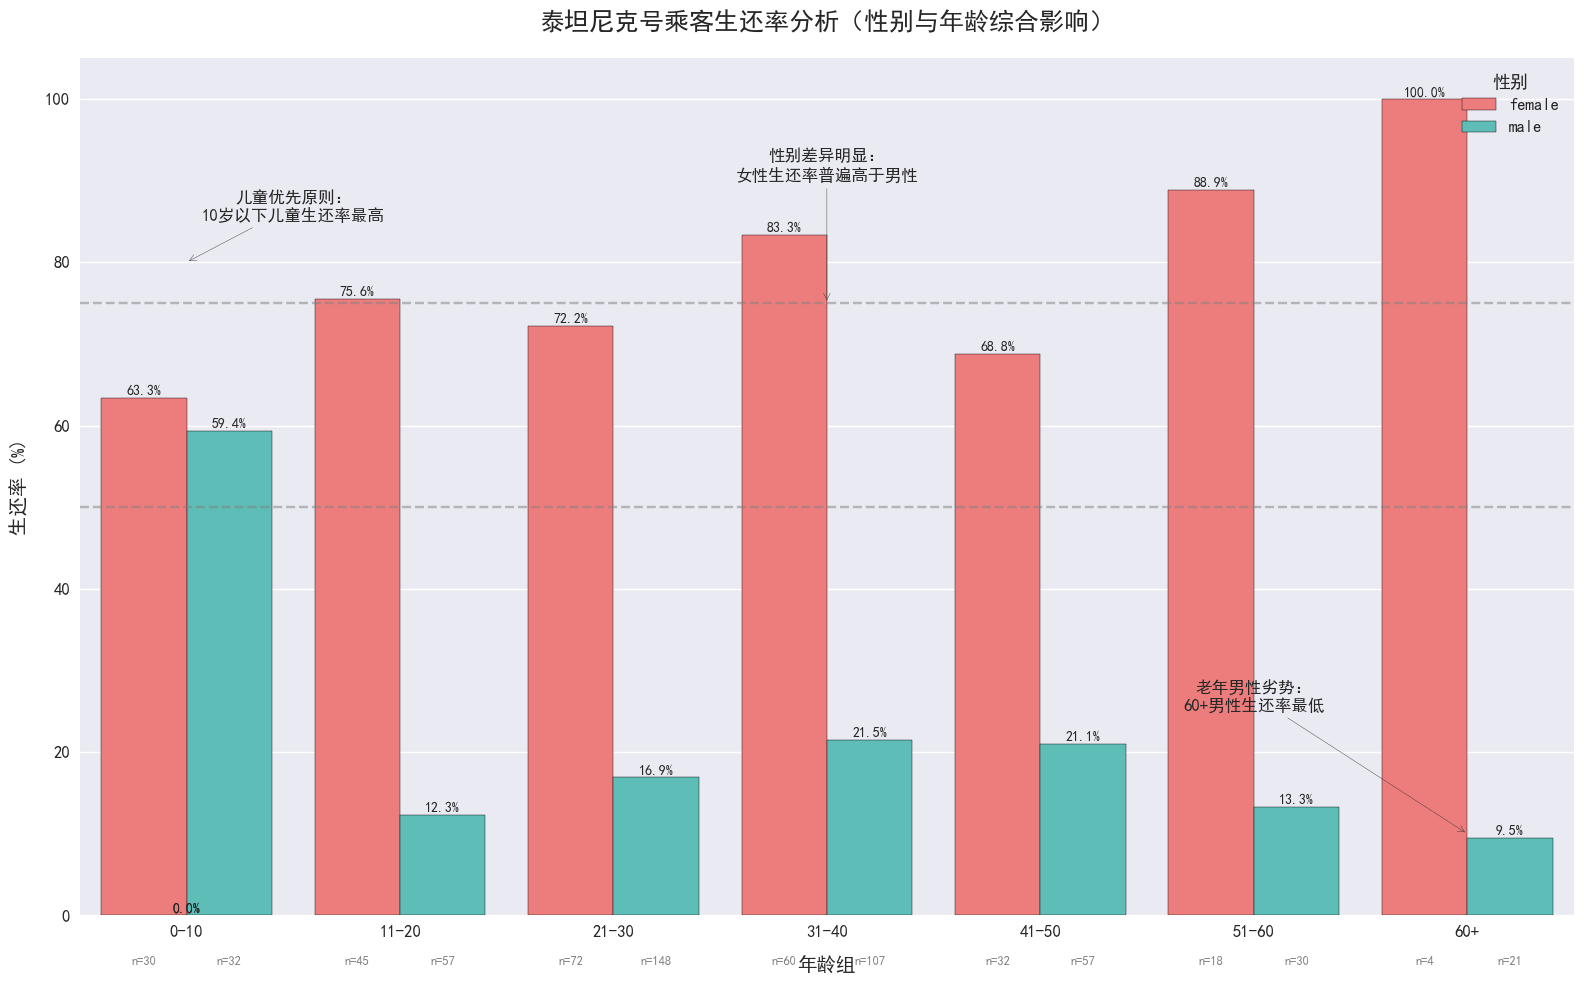

In [27]:
plt.rcParams['font.sans-serif'] = ['Simhei']  # 用来正常显示中文标签
plt.rcParams['axes.unicode_minus'] = False  # 用来正常显示负号
# 创建分组柱状图
plt.figure(figsize=(16, 10))

# 使用Seaborn创建柱状图
ax = sns.barplot(
    x='AgeGroup', 
    y='SurvivalRate', 
    hue='Sex', 
    data=survival_data,
    palette={'female': '#FF6B6B', 'male': '#4ECDC4'},
    edgecolor='black',
    errwidth=0
)

# 设置图表标题和标签
plt.title('泰坦尼克号乘客生还率分析（性别与年龄综合影响）', fontsize=18, fontweight='bold', pad=20)
plt.xlabel('年龄组', fontsize=14, labelpad=12)
plt.ylabel('生还率 (%)', fontsize=14, labelpad=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.ylim(0, 105)

# 添加数据标签
for p in ax.patches:
    height = p.get_height()
    if not np.isnan(height):
        ax.annotate(
            f'{height:.1f}%', 
            (p.get_x() + p.get_width() / 2., height),
            ha='center', 
            va='center', 
            xytext=(0, 5),
            textcoords='offset points',
            fontsize=10
        )

# 添加样本数量标注
for i, row in enumerate(survival_data.itertuples()):
    if row.Sex == 'female':
        offset = -0.2
    else:
        offset = 0.2
        
    ax.text(
        row.Index % len(labels) + offset,
        -5,
        f'n={row.count}',
        ha='center',
        va='top',
        fontsize=9,
        color='gray'
    )

# 添加参考线
plt.axhline(y=50, color='gray', linestyle='--', alpha=0.5)
plt.axhline(y=75, color='gray', linestyle='--', alpha=0.5)

# 添加图例
plt.legend(title='性别', title_fontsize=13, fontsize=12, loc='upper right')

# 添加数据来源说明
#plt.figtext(0.5, 0.01, '数据来源: Titanic乘客数据集 | 注: 分析基于712名有年龄记录的乘客', ha='center', fontsize=11, alpha=0.7)

# 添加关键结论注释
plt.annotate('儿童优先原则：\n10岁以下儿童生还率最高', 
             xy=(0, 80), xytext=(0.5, 85),
             arrowprops=dict(arrowstyle='->', color='#333'),
             fontsize=12, ha='center')

plt.annotate('性别差异明显：\n女性生还率普遍高于男性', 
             xy=(3, 75), xytext=(3, 90),
             arrowprops=dict(arrowstyle='->', color='#333'),
             fontsize=12, ha='center')

plt.annotate('老年男性劣势：\n60+男性生还率最低', 
             xy=(6, 10), xytext=(5, 25),
             arrowprops=dict(arrowstyle='->', color='#333'),
             fontsize=12, ha='center')

plt.tight_layout()
#plt.savefig('survival_rate_by_gender_age.png', dpi=300, bbox_inches='tight')
plt.show()